INFO:root:Torch is not properly imported ... check installation
INFO:root:projection file is HDF5 File object 


INFO:root:ring handeling for one slice started 


volume opened successfully : data shape:  (1871, 2160, 2560)
doing the normalization for : slice : 900


INFO:root:ring handeling finished 


Polynom coefficients [ 0.10000002 45.72638748]    Detected angular step per image: 0.10000002498912339 


INFO:tomopy.recon.algorithm:Reconstructing 1 slice groups with 1 master threads...


TypeError: '>=' not supported between instances of 'type' and 'int'

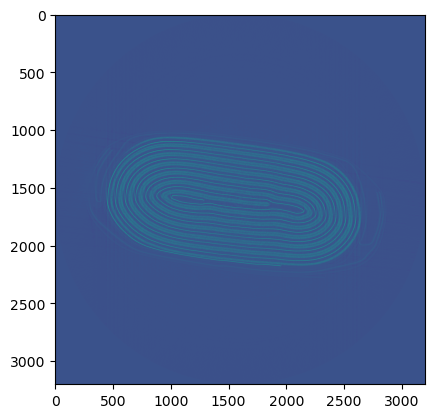

In [2]:
# first task is to be able to reconstruct one slice using the codes we already have
# in the jupyternotebook envirnoment. 

# load hdf5 file .
# load projections 
# make the reco setting dictionary based on the hdf5 file (you can hard code this )
# use reconstruction object , and reconstruct one slice function to get one slice (Did saving part too)
# write all this in a function so you can use for the rest of the project. 

# test the whole module 
from reconstruct import * 
from projection_import import * 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import imageio

def one_reconstruct(cor_value):
    # Specify the path to the HDF5 file
    file_path = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\C200\5_230110_1358_C200_____Z90_Y6460_50000eV_2x_300ms\5_230110_1358_00001.h5"

    # Create an instance of ProjectionFile
    FileObject = ProjectionFile(file_path)

    # Open the HDF5 file and retrieve the volume and metadata
    volume_path = "/entry/data/data"
    metadata_paths = ['/entry/instrument/NDAttributes/CT_MICOS_W']

    volume, metadata = FileObject.openFile(volume=volume_path, metadata=metadata_paths)

    reco_setting = {
        'angle_list_dir': '/entry/instrument/NDAttributes/CT_MICOS_W',
        'number_of_FFs': 20,
        'slice_number': 900,
        'DarkFieldValue': 200,
        'backIlluminationValue': 0,
        'offset_Angle': 0,
        'angle_range': '180 - axis centered',
        'extend_FOV_fixed_ImageJ_Stream': 0.25,
        'reco_algorithm': 'gridrec',
        'filter_name': 'shepp',
        'pixel_size': 0.72,
        'ring_radius': 50
    }
    
    # Set the COR value in the reconstruction settings
    reco_setting["COR"] = cor_value

    # Instantiate the Reconstruction object
    recoObject = Reconstruction(FileObject, gpu=True)

    # Generate the Slice using the reco_settings
    slice = recoObject.on_the_fly_one_slice(reco_setting)

    plt.imshow(slice)
    return slice

    # #Save the Reconstructed Slice

    # meta = recoObject.prepare_reco_metadata(reco_setting, save_settings)
    with h5py.File(self.path_out_reconstructed_full + '/' + self.folder_name + '.h5', 'w') as f:
        f.create_dataset("Volume", dtype='uint16', data=slice)

    # writer = FileWrite("M:\\VS Recon")
    # vol = np.zeros(shape=(10,10,10))
    # writer.write_hdf_volume(vol,"rough.h5")
    # writer.write_hdf_metadata(meta,"rough.h5")

#Call reconstruct_and_save_slice function to save the slice and metadata
one_reconstruct(1300)

# Specify the intensity range
min_intensity = -100
max_intensity = 100

# Clip the image intensities within the desired range
clipped_image = np.clip(slice, min_intensity, max_intensity)

# Scale the intensities to the range [0, 255]
scaled_image = ((clipped_image - min_intensity) / (max_intensity - min_intensity) * 255).astype(np.uint8)

# Specify the output file path
output_file = "reconstructed1.tif"

# Save the scaled image as a TIFF file
imageio.imwrite(output_file, scaled_image)


# #Save the file in Tiff
# # Specify the output file path
# output_file = "reconstructed.tif"

# # Convert the reconstructed file to a PIL image
# reconstructed_image = Image.fromarray(slice)

# # Save the reconstructed image as a TIFF file
# reconstructed_image.save(output_file, format="TIFF")



#Tomorrow Task- Check on another one, Look into the Hdf one, and inform Shahab